In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import statistics
from astropy.cosmology import FlatLambdaCDM

data = pd.read_csv ("Allsupernovae.csv") #reading in supernovae data and creating data frame 'data'

#model cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.287) #H0 value from Betoule et al. 2014, omega_m best fit value from JLA sample, 
                                        #cosmological model assuming flat Universe

#Calculating distances 
data['d_L'] = cosmo.luminosity_distance(data.zcmb) #changing cmb redshift to distance in Mpc

#Distance modulus eq 
#mu = 5log(d_L/10pc) or bmag-absmag = mu = 5 log10(D_L) + 25 if D_L is in Mpc
data['mu'] = 5*(np.log10(data.d_L)) + 25



#Betoule's mass step correction
data['MBstep'] = data.loc[data['LogMst'] >= 10,['deltaM']] #records deltaM in array if LogMst>=10
data['MBstep'].fillna(0, inplace=True) #otherwise fills in 0 in array
correction = np.array(data.MBstep)  #mass step correction only (i.e. either -0.07 or 0)

#Distance modulus eq with best fit vals from curve fit (without Bet mass step function)
data['distance_modulus'] = data.mb - (-19.10 - 0.117*data.X1 + 2.450*data.c)
        
    
#Distance Modulus with best fit vals from curve fit (Bet mass step function included)    
data['distance_modulus_step'] = data.mb - (-19.07 + correction - 0.124*data.X1 + 2.476*data.c)


#Distance modulus eq with Betouole vals (no mass step correction)
data['Bet_distance_modulus'] = data.mb - (data.MB1 - data.alpha*data.X1 + data.beta*data.c)

#Distance modulus eq with Betouole vals (mass step correction)
data['Bet_distance_modulus_step'] = data.mb - (data.MB1 + correction - data.alpha*data.X1 + data.beta*data.c)

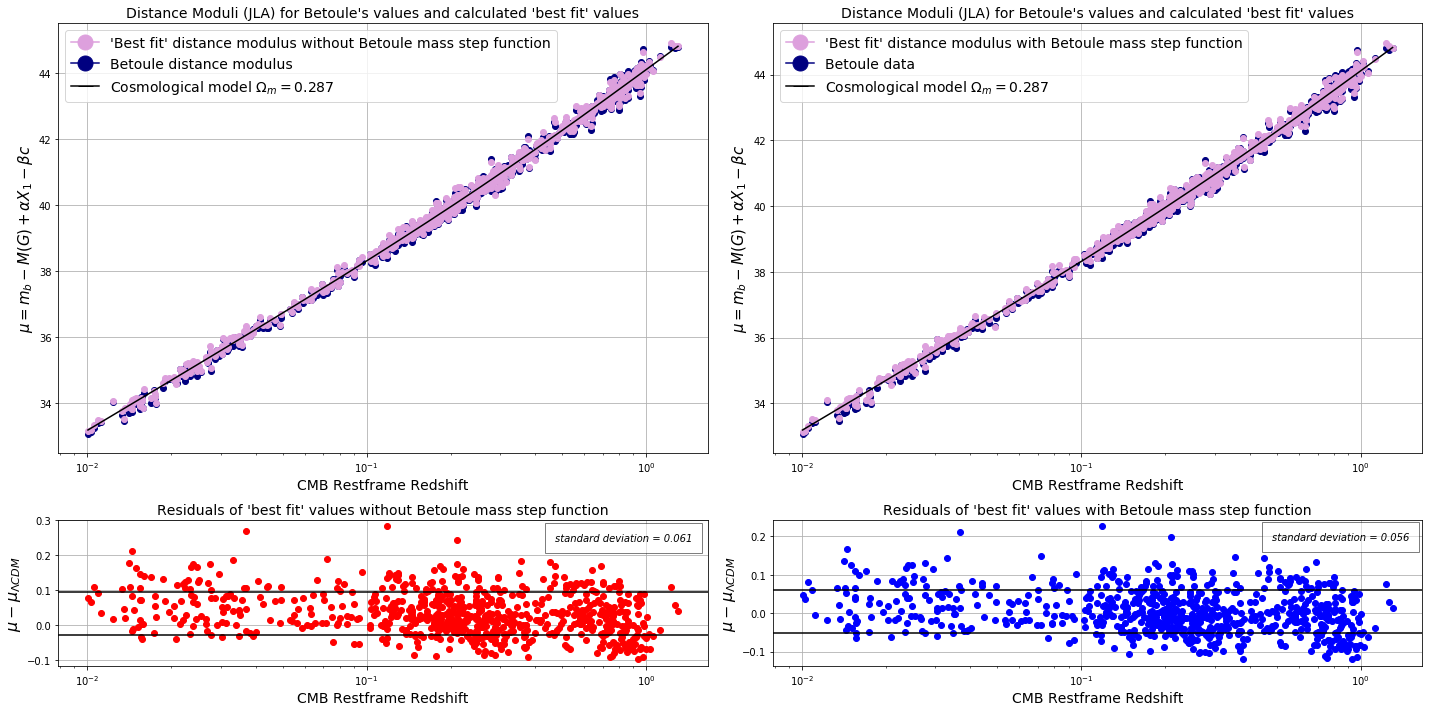

0.06064273388792317 0.05590288091652929


In [2]:
fig = plt.figure(figsize=(20,10)) 

#without step function
plt.subplot2grid((10,20),(0,0), rowspan=7, colspan=10)
plt.plot(data.zcmb, data.Bet_distance_modulus, 'o', color='navy')
plt.plot(data.zcmb, data.distance_modulus, 'o', color='plum')
plt.plot(np.sort(data.zcmb), np.sort(data.mu), 'k')

#Making a legend
plum_line = mlines.Line2D([], [], color='plum', marker='o',markersize=15, 
            label='\'Best fit\' distance modulus without Betoule mass step function')
navy_line = mlines.Line2D([], [], color='navy', marker='o',markersize=15, 
            label='Betoule distance modulus')
black_line = mlines.Line2D([], [], color='k', marker='_',markersize=15, label='Cosmological model $\Omega_m = 0.287$')
plt.legend(handles=[plum_line, navy_line, black_line], fontsize=14)

#Title and axes
plt.title('Distance Moduli (JLA) for Betoule\'s values and calculated \'best fit\' values', fontsize=14)
plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu = m_{b} - M(G) + \alpha X_{1} - \beta c$', fontsize=15)
plt.grid(True)
plt.tight_layout()

#Residuals
data['residuals_nostep'] = data.distance_modulus - data.Bet_distance_modulus

#Standard Deviation
stat1 = statistics.stdev(data.residuals_nostep)

#Mean
mean1 = np.mean(data.residuals_nostep)
plt.subplot2grid((10,20), (7,0), rowspan=3, colspan=10)
plt.plot(data.zcmb, data.residuals_nostep, 'ro')

plt.title('Residuals of \'best fit\' values without Betoule mass step function', fontsize=14)
plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$', fontsize=16)
plt.grid(True)
plt.axhline(y=mean1+stat1, color='k')
plt.axhline(y=(mean1-stat1), color='k')
plt.text(0.47, 0.24, 'standard deviation = 0.061', style='italic', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

#with step function
plt.subplot2grid((10,20),(0,10), rowspan=7, colspan=10)
plt.plot(data.zcmb, data.Bet_distance_modulus, 'o', color='navy')
plt.plot(data.zcmb, data.distance_modulus_step, 'o', color='plum')
plt.plot(np.sort(data.zcmb), np.sort(data.mu), 'k')

#Making a legend
plum_line = mlines.Line2D([], [], color='plum', marker='o',markersize=15, 
            label='\'Best fit\' distance modulus with Betoule mass step function')
navy_line = mlines.Line2D([], [], color='navy', marker='o',markersize=15, label='Betoule data')
black_line = mlines.Line2D([], [], color='k', marker='_',markersize=15, label='Cosmological model $\Omega_m = 0.287$')
plt.legend(handles=[plum_line, navy_line, black_line], fontsize=14)

#Title and axes
plt.title('Distance Moduli (JLA) for Betoule\'s values and calculated \'best fit\' values', fontsize=14)
plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu = m_{b} - M(G) + \alpha X_{1} - \beta c$', fontsize=15)
plt.grid(True)
plt.tight_layout()

#Residuals
data['residuals_step'] = data.distance_modulus_step - data.Bet_distance_modulus_step

#Standard Deviation
stat2 = statistics.stdev(data.residuals_step)

#Mean
mean2 = np.mean(data.residuals_step)
plt.subplot2grid((10,20), (7,10), rowspan=3, colspan=10)
plt.plot(data.zcmb, data.residuals_step, 'bo')

plt.title('Residuals of \'best fit\' values with Betoule mass step function', fontsize=14)
plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$', fontsize=16)
plt.grid(True)
plt.axhline(y=(mean2+stat2), color='k')
plt.axhline(y=(mean2-stat2), color='k')
plt.text(0.48, 0.19, 'standard deviation = 0.056', style='italic', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
plt.tight_layout()

plt.show()
print(stat1, stat2)
fig.savefig('All Supernovae Best Vals Comparison.pdf')
plt.close(fig)

0.05493577390431707


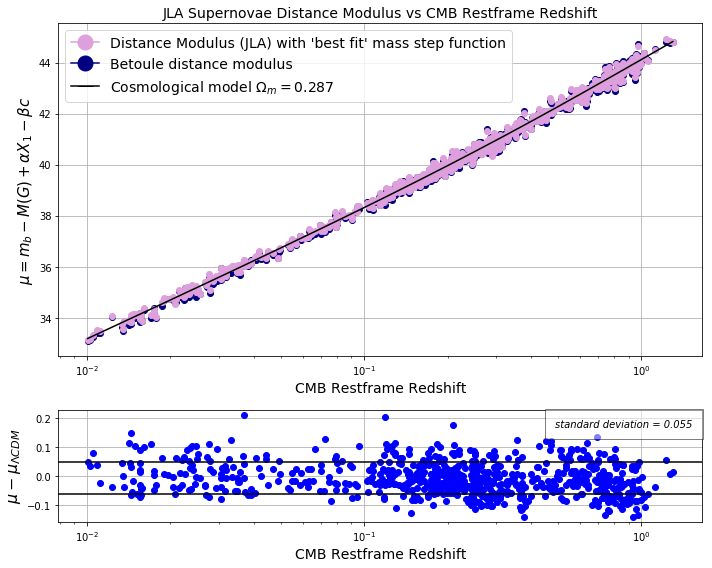

In [3]:
#my mass step correction
data['MBstep'] = data.loc[data['LogMst'] >= 10,['mydeltaM']]#records deltaM in array if LogMst>=10
data['MBstep'].fillna(0, inplace=True) #otherwise fills in 0 in array
mass_corr = np.array(data.MBstep)  #mass step correction only (i.e. either -0.049 or 0)

#Distance Modulus with best vals and my step function value
data['distance_modulus_mystep'] = data.mb - (-19.07 + mass_corr - 0.124*data.X1 + 2.476*data.c)

fig = plt.figure(figsize=(10,8))

#compare Betoule and with my step
plt.subplot2grid((10,1),(0,0), rowspan=7)
plt.plot(data.zcmb, data.Bet_distance_modulus, 'o', color='navy')
plt.plot(data.zcmb, data.distance_modulus_mystep, 'o', color='plum')
plt.plot(np.sort(data.zcmb), np.sort(data.mu), 'k')

#Making a legend
plum_line = mlines.Line2D([], [], color='plum', marker='o',markersize=15, 
            label='Distance Modulus (JLA) with \'best fit\' mass step function')
navy_line = mlines.Line2D([], [], color='navy', marker='o',markersize=15, 
            label='Betoule distance modulus')
black_line = mlines.Line2D([], [], color='k', marker='_',markersize=15, label='Cosmological model $\Omega_m = 0.287$')
plt.legend(handles=[plum_line, navy_line, black_line], fontsize=14)

#Title and axes
plt.title('JLA Supernovae Distance Modulus vs CMB Restframe Redshift', fontsize=14)
plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu = m_{b} - M(G) + \alpha X_{1} - \beta c$', fontsize=15)
plt.grid(True)
plt.tight_layout()

#Residuals
data['residuals_mystep'] = data.distance_modulus_mystep - data.Bet_distance_modulus_step

#Standard Deviation
stat3 = statistics.stdev(data.residuals_mystep)

#Mean
mean3 = np.mean(data.residuals_mystep)
plt.subplot2grid((10,1),(6,1), rowspan=4)
plt.plot(data.zcmb, data.residuals_mystep, 'bo')


plt.xscale('log')
plt.xlabel('CMB Restframe Redshift', fontsize=14)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$', fontsize=16)
plt.grid(True)
plt.axhline(y=(mean3+stat3), color='k')
plt.axhline(y=(mean3-stat3), color='k')
plt.text(0.49, 0.17, 'standard deviation = 0.055', style='italic', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
plt.tight_layout()

print(stat3)
plt.show()


fig.savefig('All Supernovae Best Vals Comparison (my deltaM).pdf')